# <center>Medical Imaging</center><br><center>Practical session 1: Image formation and reconstruction  (03/10/23)</center>
***
*Jens Maebe, Maya Abi Akl, Boris Vervenne, Meysam Dadgar* <br>
*MEDISIP, Ghent University* <br>

# General
In total, there will be 4 practical sessions. For every session you should hand in a report **in groups of 2**. These reports will count for 5 out of 20 points for the exam. The topics of the sessions:

1. Image reconstruction in tomography, CT (25%)	

2. Monte Carlo simulations, PET (25%)	

3. Image processing part I (25%)

4. Image processing part II (25%)

***
Report (this notebook) due **2 weeks** after the session, the day before the next practical

- Concise and to the point answers to the questions

- Show that you understood what was going on and what the purpose of the exercise was

- Illustrate with figures (do not forget labels, legend, colorbar etc.)

- Hand in your **notebook** in **.ipynb** and **.html** format (File -> Download as -> HTML) via UFORA

- It is normal that some pictures in the text are missing in the .html file, as long as your own plots show up correctly.

***
We are here to help you: ask questions!
- During the sessions
- Via mail:
    - Maya.AbiAkl@UGent.be
    - Boris.Vervenne@UGent.be
    - Meysam.Dadgar@UGent.be
    - Jens.Maebe@UGent.be
***
**In order to avoid problems with conflicting packages, we recommend creating a new virtual environment specifically for this course:**

- if using `conda`: https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html
- if using `pip`: https://docs.python.org/3/library/venv.html

If you do, make sure you install and launch jupyter in this new environment.
***
**Deadline for this session: Monday 16 October 2023 at 23:59**.

# 1. Image formation
## 1.1 Fanbeam transform
In a CT scanner, the photon source is an X-ray tube. To make things easier, we approximate it as an infinitesimally small point source (figure 1).

<table>
    <tr>
        <td><img src="images/CT_schematic.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
        <td><img src="images/CT_open.jpg" width="300"/><figcaption><center>(b)</center></figcaption></td>
    </tr>
</table>

<center><i>Figure 1: (a) The different parts of a CT-scanner. (b) The inside of a CT scanner with the different parts and coordinates indicated.</i></center>

From this point source, photons are fired through the patient's body. The curved detector on the other side of the patient will detect the photons which have not been attenuated along their path through the body. Because we knew the number of fired photons ($I_0$), we can calculate the attenuation from the Beer-Lambert law:
\begin{equation}
	I=\int I_0\left(E\right) e^{-\int_0^L\mu(\vec{x},E) d\vec{x}} dE,
\end{equation}

with $I$ the number of detected photons (quanta) in a detector pixel, $E$ the photon energy (remember, X-rays generated by an X-ray tube are always polyenergetic!), $\mu$ the attenuation coefficient and $\vec{x}$ a vector representing the spatial coordinate along the line, from $0$ to $L$. If we ignore the energy spectrum for now and try to determine $\int \mu(\vec{x}) d\vec{x}$, we first have to calculate the log-attenuated values:

\begin{equation}
\int_0^L \mu(\vec{x}) d\vec{x} = \log\left(I_0\right) - \log\left( I \right).
\end{equation} 

<table>
    <tr>
        <td><img src="images/fanbeam.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
        <td><img src="images/parbeam.jpg" width="300"/><figcaption><center>(b)</center></figcaption></td>
    </tr>
        <td><img src="images/fansino.jpg" width="300"/><figcaption><center>(c)</center></figcaption></td>
        <td><img src="images/parsino.jpg" width="300"/><figcaption><center>(d)</center></figcaption></td>
    <tr>
</table>
<center><i>Figure 2: (a) The geometry of a fanbeam projection, (b) parallel beam projection, (c) a sinogram obtained from a fanbeam, (d) and parallel beam projection.
</i></center>

These so-called path lengths are what will be used for the rest of the practicum session.

The ideal path followed by each photon can be represented by a line connecting the X-ray source with the place of detection. All lines (for all detector pixels) for one rotation angle together form one fan beam projection (figure 2(a)). This represents one line in the sinogram. If we now rotate the source-detector pair around the patient and sample on different angles, a complete sinogram is obtained. 

This measured sinogram, containing data acquired from different angles, is the only data received from a CT scanner. This data can be used to directly reconstruct the original object in 3D. However, in this exercise lesson, we will reconstruct only from parallel projections and not from fan beam projections. Therefore, the fan beam projections have to be converted (a.k.a. rebinned) to parallel projection data.

## 1.2 The radon transform
Figure 2(c) and 2(d) respectively show sinograms obtained in fanbeam geometry and a parallel beam geometry. Forward projecting in a parallel beam geometry can be described mathematically by the Radon transform $R(\theta,x^\prime)$: 
\begin{equation}
	R(\theta,x^\prime)= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y)\delta(x^\prime - (x\cos\theta+y\sin\theta)) dx dy.
\end{equation}
Here, $f(x,y)$ represents the distribution of the attenuation coefficients in the body.
The Radon transform $R(\theta=\Theta,x\prime=X^\prime)$ can be interpreted as the sum (if we discretize $f(x,y)$ in pixels) of the attenuation coefficients at rotation angle $\Theta$ along a line perpendicular to the $x^\prime$-axis, crossing this axis at $X^\prime$. $x^\prime$ can be calculated from $\theta$, $x$ and $y$ as:
\begin{equation}
x^\prime= x \cos\theta +y \sin\theta,
\end{equation}
which is just a rotated $x$. These data can then be reconstructed by using the inverse of the Radon transform.

## <font color='blue'>Exercise 1: Parallel beam projection</font>
In this exercise you will create a virtual CT scanner data. However, unlike in reality, we will assume a perfect parallel beam which allows us to use the Radon transform for this projection. For this exercise and the following, we will use the scikit-image (`skimage`) package of python (https://scikit-image.org/).   

Start by creating an empty 64x64 image (2D matrix) where you add a point (cluster of 2x2 pixels with value 1) somewhere off-center. Project this data over a 360° angular range using 360 projection angles by making use of the `radon` function from scikit-image (`skimage.transform.radon`).

Repeat this with an 8 pixel long off-center 'line' instead of a point.

### <font color='blue'> Report</font>
<font color='blue'>In your report, we expect to see the two images you used with their sinograms. Explain the differences you see between both sinograms and reinforce your answer by making use of overlapping profiles (line plots) of the sinograms at certain angles. </font>

<font color='red'> SOLUTION: </font>

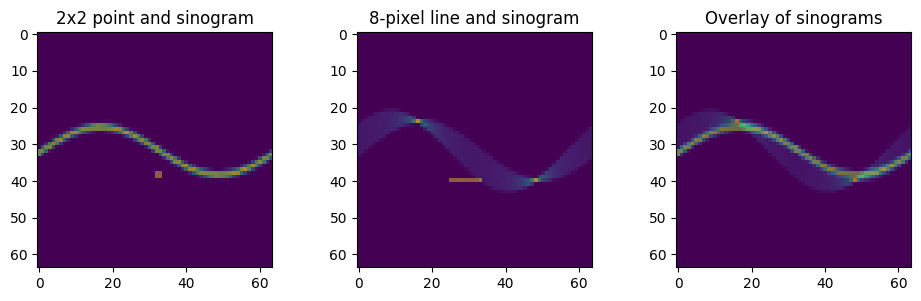

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import radon

# Empty image with a 2x2 point (off-centered)
image_0 = np.zeros((64, 64))
image_0[38:40, 32:34] = 1

theta = np.linspace(0, 360, max(image_0.shape), endpoint=False) # angles to be projected on the image
sinogram_0 = radon(image_0, theta=theta) # sinogram of the uncentered point
overlay_0 = np.dstack((image_0, sinogram_0))


# Empty image with an 8-pixel long line
image_1 = np.zeros((64, 64))
image_1[40, 25:34] = 1

sinogram_1 = radon(image_1, theta=theta) # sinogram of the 8-pixel long line

# plotting 2x2 point, 8-pixel long line and the overlay of both
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
figs.tight_layout(pad=3.0)
axs[0].imshow(image_0)
axs[0].imshow(sinogram_0, alpha=0.6)
#axs[0].imshow(overlay_0)
axs[0].set_title('2x2 point and sinogram')

axs[1].imshow(image_1)
axs[1].imshow(sinogram_1, alpha=0.6)
axs[1].set_title('8-pixel line and sinogram')

axs[2].imshow(sinogram_0)
axs[2].imshow(sinogram_1, alpha=0.5)
axs[2].set_title('Overlay of sinograms')

plt.show()

**The sinogram of the single point gives a sharp sinusoidal wave, and the more points you add to the line, the blurrier the wave gets. <br>
This is expected as the projections of the added pixels increase the number of sinusoidal waves of different phases and amplitudes to the plot.**


## <font color='blue'>Exercise 2: the sinogram</font>
To understand the content of a sinogram, we will take a closer look at the relation between an image and its sinogram. Therefore, start by making an image containing four points (each a cluster of 2x2 pixels). The first point should be in the center, the three other points should be located off-center, at different distances from the center. Make use of the `radon` function in scikit-image to project the image to sinogram space.

### <font color='blue'> Report</font>
<font color='blue'>Plot the original image and show it together with its sinogram obtained from a 360° and a 180° angular range. Use 90 projection angles in both cases.

Now answer these questions:
- Why do we call this a sinogram?
- What is the relation between the sinogram and the position in the original image?
- Would you use the 360° or the 180° angular range when the number of projection angles is fixed? Why? </font>

<font color='red'> SOLUTION: </font>

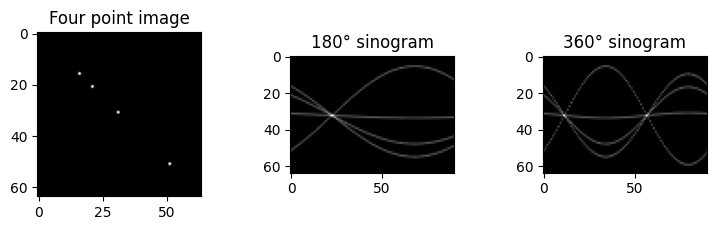

In [2]:
image_2 = np.zeros((64, 64)) # empty 64x64 pixel image

# 4 2x2 points
image_2[31:32, 31:32] = 1
image_2[21:22, 21:22] = 1
image_2[51:52, 51:52] = 1
image_2[16:17, 16:17] = 1

theta_180 = np.linspace(0, 180, 90, endpoint=False) # image projection angles (range 180)
theta_360 = np.linspace(0, 360, 90, endpoint=False) # image projection angles (range 360)

# sinograms for both ranges (180 and 360)
sinogram_180 = radon(image_2, theta=theta_180)
sinogram_360 = radon(image_2, theta=theta_360)

# plotting
figs, axs = plt.subplots(1, 3, figsize=(8, 8))
figs.tight_layout(pad=3.0)

axs[0].imshow(image_2, cmap='gray')
axs[0].set_title('Four point image')

axs[1].imshow(sinogram_180, cmap='gray')
axs[1].set_title('180° sinogram')

axs[2].imshow(sinogram_360, cmap='gray')
axs[2].set_title('360° sinogram')

plt.show()

**<span style="color:red">
Q: Why do we call this a sinogram? <br></span>**

**A: The result of the Radon transform performed on any uncentered point is a sum of sinusoidal waves of varying amplitudes and phases. <br>
The outcome of this is a graph with varying sinusoidal waves representing the different projections of the object that is being analyzed. <br>
The etymology of the word “sinogram” comes from the prefix sino, meaning something that is similar to a sine wave, and gram, which refers to a written,
drawn or any sort of graphical form.** <br><br>

**<span style="color:red">
Q: What is the relation between the sinogram and the position in the original image?<br> </span>**

**A: Different positions in the original image result in a different coefficient of the sine function.<br> 
The projections of the image in different angles may result in a difference in the amplitude and phase of the corresponding sinusoidal
wave sum that results from the Radon transform. <br>
In this case, as the four points are aligned on a diagonal line, the sinograms of the different points meet at a point (one for 180° and two for 360°) 
that represents the projection angle that aligns with this diagonal line.** <br><br>

**<span style="color:red">
Q: Would you use the 360° or the 180° angular range when the number of projection angles is fixed? Why? <br> </span>**

**A: We would use 180°, since when the number of projections is fixed, with a smaller angular range we can exhibit more details.<br>
Using a 360° angular range provides the image with its corresponding mirror image for angles greater than 180°, adding no valuable
information to the result and presenting a source of error at the time of the image reconstruction.**

## <font color='blue'>Exercise 3: the sinogram (continued)</font>
To get an even better feel of what kind of data is included in a sinogram, download the file **Abdomen.bin** from Ufora and open it. This data is a slice of an in-vivo abdominal scan of a mouse, measured with a cone-beam micro-CT system in the Infinity lab. We already rebinned the cone-beam sinogram to parallel beam geometry for you and below you can find the code to import the sinogram data. Make use of the `iradon` function from scikit.image (`skimage.transform.iradon`) to reconstruct the sinogram into an image.

### <font color='blue'> Report</font>
<font color='blue'>Answer these questions:

- What is wrong with this image?
- What could be the physical cause (a scanner problem) of this? (Think about all elements contained in a CT system!)
- Correct for this artefact on the sinogram; plot the improved image and explain what you did</font>

In [3]:
with open("Abdomen.bin", 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)
    sinogram_rec = np.transpose(np.reshape(data, [360,729]))

<font color='red'> SOLUTION: </font>

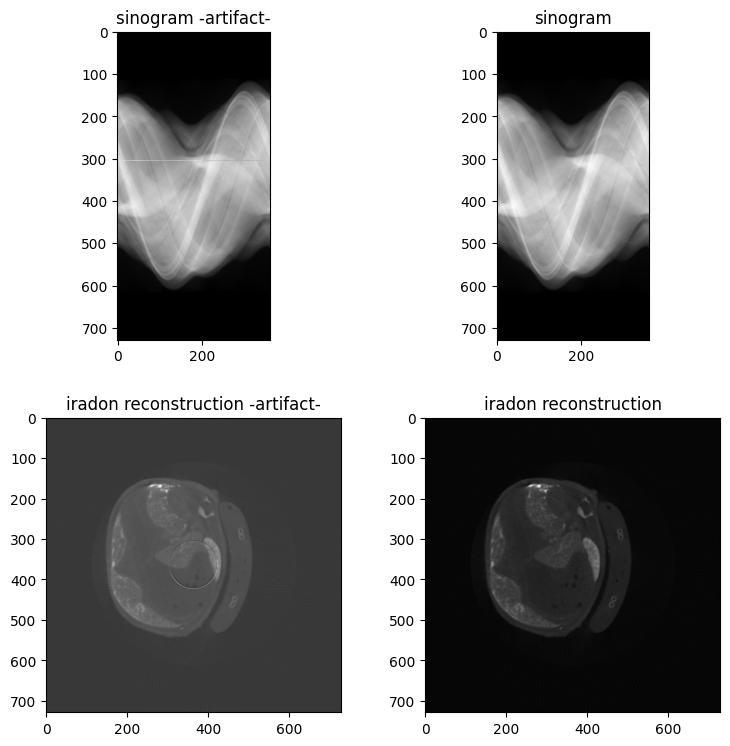

In [4]:
from skimage.transform import iradon

sinogram_og = sinogram_rec.copy() # making a copy so it doesn't get altered
irad_theta = np.linspace(0., 360., sinogram_rec.shape[1], endpoint=False) # projection angles
irad_og = iradon(sinogram_rec, theta=irad_theta) # using iradon funciton for the reconstruction -with artifact-

# averaging the rows before and after the artifact
sinogram_rec[305, :] = (sinogram_rec[304, :] + sinogram_rec[306, :]) / 2 # averaging the row before and after the artifact to remove it
irad = iradon(sinogram_rec, theta=irad_theta) # -no artifact-


# plot sinogram and reconstruction before and after removing the artifact
figs, axs = plt.subplots(2, 2, figsize=(8, 8))
figs.tight_layout(pad=3.0)

axs[0][0].imshow(sinogram_og, cmap='gray')
axs[0][0].set_title('sinogram -artifact-')

axs[1][0].imshow(irad_og, cmap='gray')
axs[1][0].set_title('iradon reconstruction -artifact-')

axs[0][1].imshow(sinogram_rec, cmap='gray')
axs[0][1].set_title('sinogram')

axs[1][1].imshow(irad, cmap='gray')
axs[1][1].set_title('iradon reconstruction')

plt.show()

**<span style="color:red">
Q: What is wrong with this image? <br></span>**
**A: There is a noticeable straight horizontal line in the sinogram, which leads to a ring-shaped artifact in the reconstructed image.** <br><br>

**<span style="color:red">
Q: What could be the physical cause (a scanner problem) of this? (Think about all elements contained in a CT system!) <br></span>**
**A: A detector in a specific position might be broken. <br>
There might be a defective pixel in a detector. <br>
There might be a dust particle obstructing the scintillator crystal. <br>
Unexpected vibration could have also cause a similar artifact.**
<br><br>

**<span style="color:red">
Q: Correct for this artefact on the sinogram; plot the improved image and explain what you did <br></span>**
**A: We averaged the row before and the row after the artifact to infer the value of the pixels of that damaged row in the sinogram. <br>
This works because we know that the defect affects a very thin line of pixels (1pxl width), but if the artifact was wider, a more intricate and refined solution should be used to get a better result without losing too much information.**

## <font color='blue'>Exercise 4: Build your own forward projector</font>
In medical image reconstruction, the name ‘projector’ or ‘forward projector’ is given to an operation
which transforms data from image space to projection space (the sinogram). In this exercise, we want
you to implement your own projector in Python, as an alternative to the `radon` function. Implement this projector by combining image rotation followed by summation along one axis. You should keep x' and sum along y'.

Start with a 256×256 image that you generate with the `shepp_logan_phantom()` function from `skimage.data`. Now use the functions `skimage.transform.rotate` and `np.sum` to perform projections and to build a sinogram. Use 360 projection angles over an angular range of 360 . Also use `radon` to forward project the original image, so we can compare your implementation to the one you try to mimic.


### <font color='blue'> Report</font>
<font color='blue'>Show the sinogram obtained with your own projector and compare to the sinogram obtained with the radon function. </font>

In [5]:
from skimage.data import shepp_logan_phantom
from skimage.transform import rescale, rotate, radon

image_ph = shepp_logan_phantom()
image_ph = rescale(image_ph, scale=256/400) # rescale from 400x400 to 256x256

<font color='red'> SOLUTION: </font>

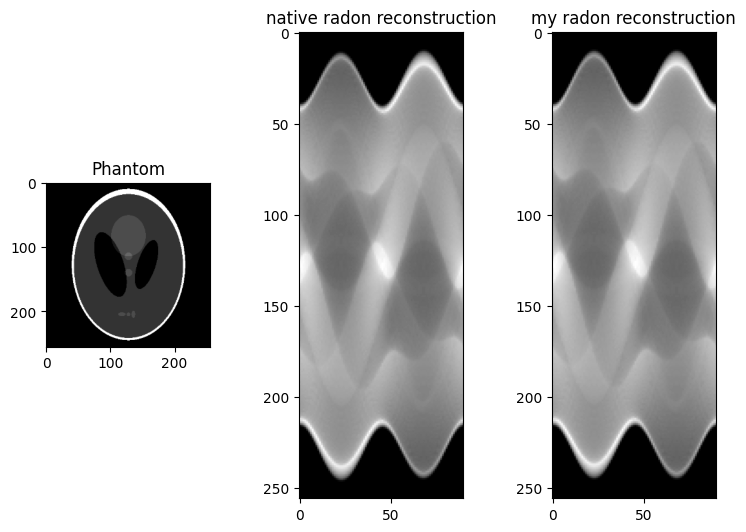

In [6]:
my_fp_theta = np.linspace(0, 360, 90, endpoint=False) # projection angles
native_fp = radon(image_ph, theta=my_fp_theta) # native forward projection

rotations = np.array([rotate(image_ph, -theta) for theta in my_fp_theta]) # array of the different rotations of the image (90x164x164)
my_sin = np.array([rot.sum(axis=0) for rot in rotations]).T # sum along axis and then transpose

# plot phantom, my reconstruction and native reconstruction
figs, axs = plt.subplots(1, 3, figsize=(8, 8))
figs.tight_layout(pad=3.0)
axs[0].imshow(image_ph, cmap='gray')
axs[0].set_title('Phantom')

axs[1].imshow(native_fp, cmap='gray')
axs[1].set_title('native radon reconstruction')

axs[2].imshow(my_sin, cmap='gray')
axs[2].set_title('my radon reconstruction')

plt.show()

**There are no noticeable differences between the skimage sinogram and the manually made one.**

## 2. Image reconstruction
### 2.1 Backprojection
The backprojection operation describes the transformation back from projection space to image space and it is the mathematical adjoint of the Radon transform:

\begin{equation}
B(x,y) = 
\int_0^\pi R(\theta,x')d\theta
\end{equation} 

Here, $B(x, y)$ represents the backprojected image, and $R(\theta, x′)$ is the sinogram. For one fixed angle $\Theta$, the backprojection $B(x, y; \theta = \Theta)$ is performed by smearing the values of $R(\theta = \Theta, x′)$ along perpendicular lines (Figure 4). If we repeat this operation for all angles $\theta$, the sum of all $B(x,y;\theta = \Theta)$ will form $B(x, y)$.

<table>
    <tr>
        <td><img src="images/backproj.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
    </tr>
</table>
<center><i>Figure 4: Backprojection of all values of R(θ,x′) to a rotated image for a fixed angle Θ.
</i></center>


## <font color='blue'>Exercise 5: Build you own backprojector</font>
We can backproject the sinogram obtained in the previous exercise by first smearing $R(\theta = \theta,x′)$ into a rotated image. When we rotate this image back to the original position and sum over all angles, we obtain a backprojection of the sinogram. Again, use the functions `skimage.transform.rotate` and `np.sum` to implement a backprojector. Work on the sinogram you created in exercise 2. 

### <font color='blue'> Report</font>
<font color='blue'> In your report:
- show your backprojection for 10 angles over a range of 0-360
- show your backprojection for 90 angles over a range of 0-360 

Answer these questions:
- What is the difference between the original image and your backprojection image? 
- How can the backprojection be improved? </font>

<font color='red'> SOLUTION: </font>

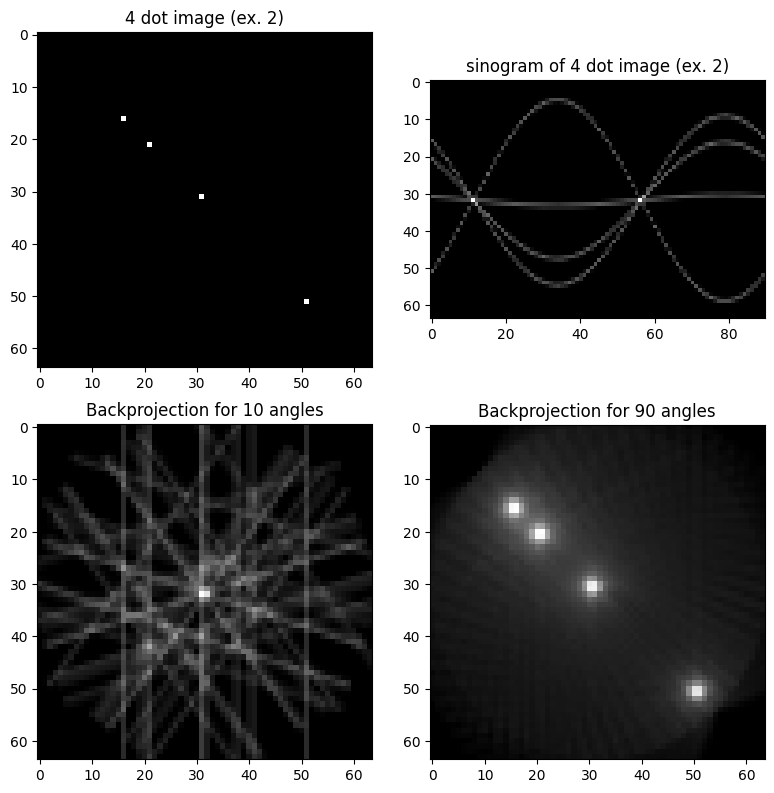

In [7]:
# general function for the manual backprojection
def my_back_projector(image, sinogram, ang_range, num_angles):
    my_angles = np.linspace(0, ang_range, num_angles, endpoint=False) # projection angles
    my_back_projection = np.zeros(image.shape) # empty array with the shape of the original image

    # backprojection algorithm
    for i in range(len(my_angles)):
        theta = my_angles[i] # current projection angle
        
        # project and rotate
        projection = np.array([sinogram[:, i]] * image.shape[0]) 
        projection = rotate(projection, theta)
        my_back_projection += projection

    return my_back_projection

my_back_projection_10 = my_back_projector(image_2, sinogram_360, 360, 10) # backprojection with 10 angles
my_back_projection_90 = my_back_projector(image_2, sinogram_360, 360, 90) # backprojection with 90 angles

# plot image with sinogram and respective backprojections
figs, axs = plt.subplots(2, 2, figsize=(8, 8))
figs.tight_layout()

axs[0,0].imshow(image_2, cmap='gray')
axs[0,0].set_title('4 dot image (ex. 2)')

axs[0,1].imshow(sinogram_360, cmap='gray')
axs[0,1].set_title('sinogram of 4 dot image (ex. 2)')

axs[1,0].imshow(my_back_projection_10, cmap='gray')
axs[1,0].set_title('Backprojection for 10 angles')

axs[1,1].imshow(my_back_projection_90, cmap='gray')
axs[1,1].set_title('Backprojection for 90 angles')

plt.show()


**<span style="color:red">Q: What is the difference between the original image and your backprojection image?<br></span>**
**A: The backprojected image is much blurrier than the original one, with non-clear edges and distorted size. <br>
The closer to the edge, the worse the image quality, and it is noticeable that some information on the corners of the image is missing.
Between the backprojected images, the one with more projection angles presents the better quality.**<br><br>

**<span style="color:red">Q: How can the backprojection be improved?<br></span>**
**A: It can be improved by using more projection angles so you get as much information as possible, and then filter it to get rid of the noise generated by the projections.**

## 2.3 Filtered backprojection
To understand the origin of the blur in the reconstructed image, take a look at the sampling in the Fourier domain.
Take the backprojection from a single angle:

\begin{equation}
B(x,y;\theta=\Theta) = R(\theta = \Theta,x')
\end{equation} 

$$\begin{aligned}
\mathcal{B}(\nu_x,\nu_y;\theta=\Theta) &=& \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} B(x,y;\theta=\Theta) e^{-2\pi i(x\nu_x+y\nu_y)}dx dy \\
&=&  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} R(\theta=\Theta,x^\prime) e^{-2\pi i(x\nu_x+y\nu_y)}dx^\prime dy^\prime \\
&=& \mathcal{R}(\theta=\Theta,\nu_{x^\prime}) \delta(\nu_{y^\prime}) \\
\end{aligned}$$

From the central slice theorem (course notes) we know that $\mathcal{R}(\theta=\Theta,\nu_{x^\prime})=\mathcal{F}(\nu_x,\nu_y)\mid_{\nu_{y^\prime}=0}$. Thus, **every backprojection along 1 angle is actually equal to one line of the Fourier transform of the original image!** Superimposing all lines and then taking the inverse Fourier transform would result in our blurry backprojection image. In other words, the blur in the reconstructed image arises from the fact that the center of the Fourier space will be oversampled due to the radial sampling. You get an overestimation of the low frequency components and an underestimation of the high frequency components. This is illustrated in figure 5.

<table>
    <tr>
        <td><img src="images/sampling_fourier.jpg" width="300"/><figcaption><center>(a)</center></figcaption></td>
        <td><img src="images/grid.jpg" width="300"/><figcaption><center>(b)</center></figcaption></td>
        <td><img src="images/ramp.jpg" width="300"/><figcaption><center>(c)</center></figcaption></td>
</table>
<center><i>Figure 5: (a) Sampling of the Fourier space using 20 backprojections. (b) The radial grid on which the Fourier space is sampled. (c) The ramp filtered used to compensate for the oversampling.
</i></center>

To compensate for the oversampling at lower frequencies, you should use a filter which is proportional to the circumference of a circle defined with radius $\nu =\sqrt{\nu_x^2+\nu_u^2}$. Proportionality with the circumference is equal to proportionality with the radius. Thus our filter will be $\nu$, also called a ramp filter (Figure 5(c)). Thanks to the above, we can discriminate three ways to get to our filtered backprojection, of which the second is the simplest and will be used in the next exercise:

1. **Projections** $\rightarrow$ backprojection $\rightarrow$ 2D FT $\rightarrow$ filter with 2D ramp filter $\rightarrow$ 2D IFT $\rightarrow$ **Filtered reconstructed image**
2. **Projections** $\rightarrow$ 1D FT $\rightarrow$ filter with 1D ramp filter $\rightarrow$ 1D IFT $\rightarrow$ backprojection $\rightarrow$ **Filtered reconstructed image**
3. **Projections** $\rightarrow$ backprojection $\rightarrow$ superimposing all lines in correct angle $\rightarrow$ interpolation to get more uniform grid in 2D FT space $\rightarrow$ 2D IFT $\rightarrow$ **Filtered reconstructed image**


## <font color='blue'>Exercise 6: Filtered backprojection</font>
In this exercise, you will have to solve the problem of oversampling with the second method. Work with the sinogram obtained with radon in exercise 4 (Shepp-Logan phantom). Use all 90 angles. First you will have to transform the sinogram to Fourier space. Next, filter your projection data using a ramp filter. After returning to sinogram space with an inverse Fourier transform, backproject the filtered sinogram using your backprojector from the previous exercise. Compare your result to the result of applying `iradon(..., filter_name="ramp")` to your unfiltered sinogram data. Also compare with your own backprojector without filtering.

### Remark
Make use of the `np.fft.rfft` and `np.fft.irfft` functions to perform the Fourier and inverse Fourier transforms on a real-valued input. This only computes the positive frequencies, so our ramp filter should also only be defined for the positive frequencies (see code below).

### <font color='blue'> Report</font>
<font color='blue'> 
Plot an image of both your own filtered and unfiltered reconstructions and the iradon-backprojection. Also show the original and filtered sinograms. Is the result better with filtering? Limit the number of angles to 20. What happens now?</font>

In [8]:
import numpy as np
from numpy.fft import rfft, irfft
from skimage.data import shepp_logan_phantom
from skimage.transform import rescale

image = shepp_logan_phantom()
image = rescale(image, scale=256/400)
ramp = np.linspace(0, 1, num=256//2 + 1)
ramp = ramp[:, np.newaxis] # adding an axis so the dimensions are the same

<font color='red'> SOLUTION: </font>

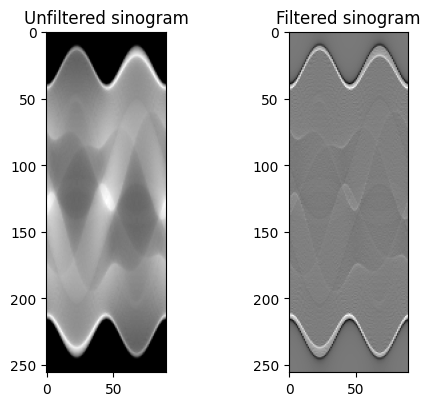

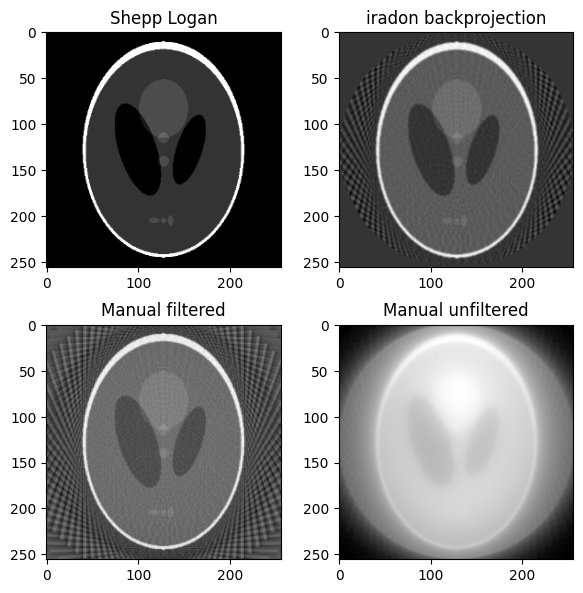

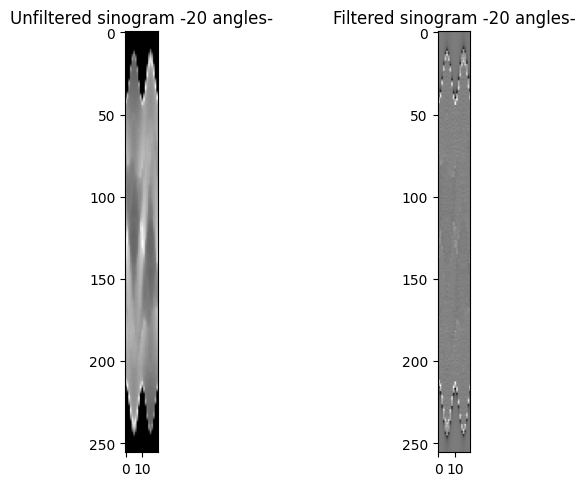

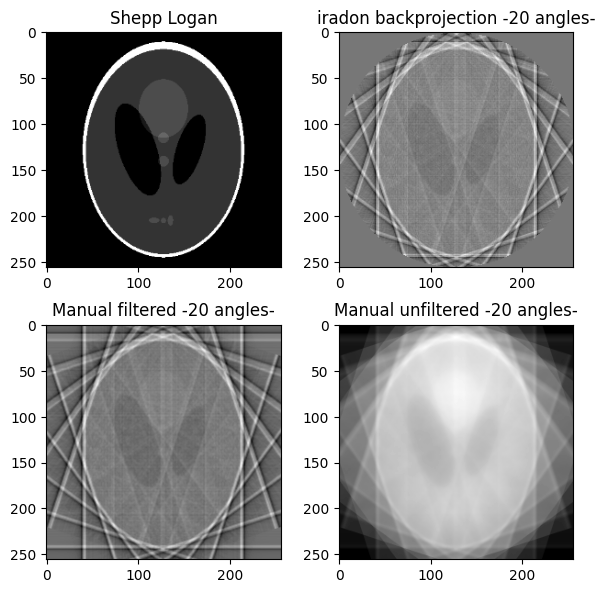

In [25]:
fft_domain = rfft(my_sin, axis=0) # convert to fft domain
filtered_fft = fft_domain * ramp # filter using given ramp filter

# unfiltered
sin_domain = irfft(fft_domain, axis=0) # getting back to sinogram domain
back_projection = my_back_projector(image, sin_domain, 360, 90) # back projecting to reconstruct the image

# filtered
sin_domain_filtered = irfft(filtered_fft, axis=0)
back_projection_filtered = my_back_projector(image, sin_domain_filtered, 360, 90)

# iradon backprojection
theta_irad = np.linspace(0, 360, 90, endpoint=False) # 90 projection angles
iradon_backprojection = iradon(sin_domain, theta_irad, filter_name='ramp') # native_backprojection 


# Now repeating with projection angles instead of 90
# Sinogram
theta_20 = np.linspace(0, 360, 20, endpoint=False)
sinogram_20 = radon(image, theta=theta_20)

# Unfiltered 20 angles
fft_domain_20 = rfft(sinogram_20, axis=0) # converting to fft domain
sin_domain_20 = irfft(fft_domain_20, axis=0) # sinogram domain unfiltered 20 proj angles
back_projection_20 = my_back_projector(image, sin_domain_20, 360, 20)

# Filtered 20 angles
fft_domain_20_filtered = fft_domain_20 * ramp # filtering using a ramp filter
sin_domain_20_filtered = irfft(fft_domain_20_filtered, axis=0)
back_projection_20_filtered = my_back_projector(image, sin_domain_20_filtered, 360, 20)

# iradon backprojection with 20 angles
iradon_backprojection_20 = iradon(sin_domain_20, theta_20, filter_name='ramp')


# ----------------------------------------  Plotting -----------------------------------------------

# plot unfiltered and filtered sinograms 
figs, axs = plt.subplots(1, 2, figsize=(5, 4))
figs.tight_layout()

axs[0].imshow(sin_domain, cmap='gray')
axs[0].set_title('Unfiltered sinogram')

axs[1].imshow(sin_domain_filtered, cmap='gray')
axs[1].set_title('Filtered sinogram')

plt.show()


# plot phantom with corresponding sinogram, manual backprojection and native backprojection
figs, axs = plt.subplots(2, 2, figsize=(6, 6))
figs.tight_layout()

axs[0][0].imshow(image, cmap='gray')
axs[0][0].set_title('Shepp Logan')

axs[0][1].imshow(iradon_backprojection, cmap='gray')
axs[0][1].set_title('iradon backprojection')

axs[1][0].imshow(back_projection_filtered, cmap='gray')
axs[1][0].set_title('Manual filtered')

axs[1][1].imshow(back_projection, cmap='gray')
axs[1][1].set_title('Manual unfiltered')

plt.show()



# plot unfiltered and filtered sinograms -20 angles-
figs, axs = plt.subplots(1, 2)
figs.tight_layout()

axs[0].imshow(sin_domain_20, cmap='gray')
axs[0].set_title('Unfiltered sinogram -20 angles-')

axs[1].imshow(sin_domain_20_filtered, cmap='gray')
axs[1].set_title('Filtered sinogram -20 angles-')

plt.show()


# plot phantom with corresponding sinogram, manual backprojection and native backprojection -20 angles-
figs, axs = plt.subplots(2, 2, figsize=(6, 6))
figs.tight_layout()

axs[0][0].imshow(image, cmap='gray')
axs[0][0].set_title('Shepp Logan')

axs[0][1].imshow(iradon_backprojection_20, cmap='gray')
axs[0][1].set_title('iradon backprojection -20 angles-')

axs[1][0].imshow(back_projection_20_filtered, cmap='gray')
axs[1][0].set_title('Manual filtered -20 angles-')

axs[1][1].imshow(back_projection_20, cmap='gray')
axs[1][1].set_title('Manual unfiltered -20 angles-')

plt.show()

**<span style="color:red">Q: Is the result better with filtering?<br></span>**
**A: The result is significantly better with filtering, with sharper edges and better contrast, allowing more details to be observed.<br>
The unfiltered backprojection presents a blurrier image where the different components can not be fully differentiated.<br>
It is also important to note that on the filtered backprojections the projection lines are also much more sharp and visible.**<br><br>

**<span style="color:red">Q: Limit the number of angles to 20. What happens now?<br></span>**
**A: The image is missing information from the lack of angles in certain places, and the original image can not be elucidated.<br>
With only 20 projection angles there is not a significant difference between the unfiltered and filtered images in terms of details.**